### K-Means Clustering
K -means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups).The goal of this algorithm is to find groups in the data, with the number of groups
represented by the variable K . The algorithm works iteratively to assign each data
point to one of K groups based on the features that are provided. Data points are
clustered based on feature similarity.                                                                                          
It starts with K as the input which is how many clusters you want to find. 

Place K centroids in random locations in your space.

Now, using the euclidean distance between data points and centroids, assign each data point to the cluster which is close to it. 

Recalculate the cluster centers as a mean of data points assigned to it.

Repeat until no further changes occur.


Here we are using the cricket data to cluster the players by using their total runs and total wickets taken.

importing the necessary libraries and the dataset.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
data=pd.read_excel('C:/Users/Vivek/Downloads/cricket_data.xlsx')
data.shape

(13, 3)

In [10]:
data

,Player,Runs,Wickets
0,Sachin Tendulkar,18426,192
1,Kripal Singh,12458,0
2,Fakhar Zaman,9840,421
3,Aavishkar Salvi,3467,480
4,Abbas Ali,4877,512
5,Brian Lara,10405,12
6,James Anderson,3287,575
7,Dale Steyn,2145,437
8,Wasim Akram,4562,502
9,Glenn McGrath,2543,381


#####                                                                                                                                                                                                                              
There are 13 players and their total number of runs scored is in Runs column, and the wickets taken by each player is mentioned in Wickets column. 

[[18426   192]
 [12458     0]
 [ 9840   421]
 [ 3467   480]
 [ 4877   512]
 [10405    12]
 [ 3287   575]
 [ 2145   437]
 [ 4562   502]
 [ 2543   381]
 [10151    14]
 [10889     0]
 [11579   142]]


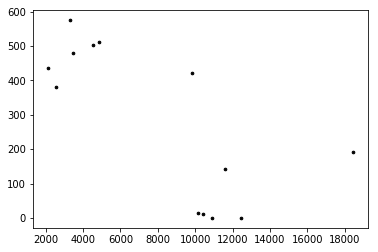

In [7]:
f1=data['Runs'].values
f2=data['Wickets'].values
X=np.array(list(zip(f1,f2)))
print(X)
plt.scatter(f1,f2, c='black', s=7)

####  We can see that some people have high runs scored  but less no.of wickets and others with less runs and high wickets. We can assume them to be batsmen and bowler respectively. Others can be treated as all-rounders.

#### Applying the KMeans model with K=3

In [8]:
from sklearn.cluster import KMeans

#no.of clusters
kmeans=KMeans(n_clusters=3)
#fitting the input data
kmeans=kmeans.fit(X)
#getting cluster labels
labels=kmeans.predict(X)
#Centroid values
centroids=kmeans.cluster_centers_

In [9]:
print(labels)

[2 0 0 1 1 0 1 1 1 1 0 0 0]


In [25]:
data_new=pd.DataFrame({'Player':data['Player'],'Runs':data['Runs'],'Wickets':data['Wickets'],'Label':labels})
data_new

,Player,Runs,Wickets,Label
0,Sachin Tendulkar,18426,192,2
1,Kripal Singh,12458,0,0
2,Fakhar Zaman,9840,421,0
3,Aavishkar Salvi,3467,480,1
4,Abbas Ali,4877,512,1
5,Brian Lara,10405,12,0
6,James Anderson,3287,575,1
7,Dale Steyn,2145,437,1
8,Wasim Akram,4562,502,1
9,Glenn McGrath,2543,381,1


#### The KMeans algorithm assigns each player to a cluster.The label indicates to which cluster the player belongs to.

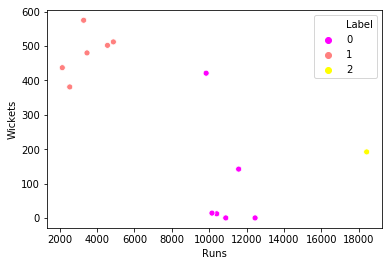

In [52]:
sb.scatterplot(data_new['Runs'],data_new['Wickets'], hue=data_new['Label'], palette='spring')

### WCSS (within-cluster sum of squares)
WCSS is a measure developed within the ANOVA framework. It gives a very good idea about the different distance between different clusters and within clusters, thus providing us a rule for deciding the appropriate number of clusters.

In [12]:
# Get the WCSS for the current solution
kmeans.inertia_

10799182.5

In [14]:
# Create an empty list
wcss=[]

# Create all possible cluster solutions with a loop
for i in range(1,5):
    # Cluster solution with i clusters
    kmeans = KMeans(i)
    # Fit the data
    kmeans.fit(X)
    # Find WCSS for the current iteration
    wcss_iter = kmeans.inertia_
    # Append the value to the WCSS list
    wcss.append(wcss_iter)
    
wcss

[292501070.7692307, 59523747.38095238, 10799182.5, 6189339.083333333]

### The Elbow Method
The idea of the elbow method is to run k-means clustering on the dataset for a range of values of k (say, k from 1 to 4 in the examples above), and for each value of k calculate the sum of squared errors. Then, plot a line chart of the SSE for each value of k. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best. The idea is that we want a small SSE, but that the SSE tends to decrease toward 0 as we increase k (the SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster). So our goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

Text(0, 0.5, 'Within-cluster Sum of Squares')

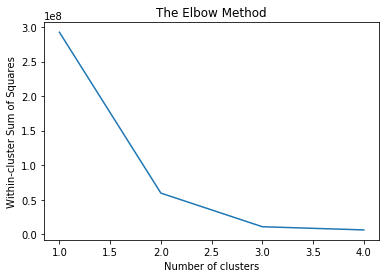

In [16]:
# Create a variable containing the numbers from 1 to 4, so we can use it as X axis of the future plot
number_clusters = range(1,5)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')

#### We see that there is no significant value after 3.0. Hence our choice of 3 clusters was correct.